<a href="https://colab.research.google.com/github/gracia10032005/MAGANG/blob/main/SHT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib


Preview of the dataset:


,id,timestamp,temperature,humidity
0,1,2025-01-10T11:24:54.085000Z,23.5,60.2
1,2,2025-01-10T11:25:28.935000Z,23.5,60.2
2,3,2025-01-10T14:35:48.995000Z,23.5,60.2
3,4,2025-01-10T14:36:03.403000Z,23.5,60.2
4,5,2025-01-10T10:25:58.092000Z,28.7,73.0



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10 non-null     int64  
 1   timestamp    10 non-null     object 
 2   temperature  10 non-null     float64
 3   humidity     10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 452.0+ bytes
None


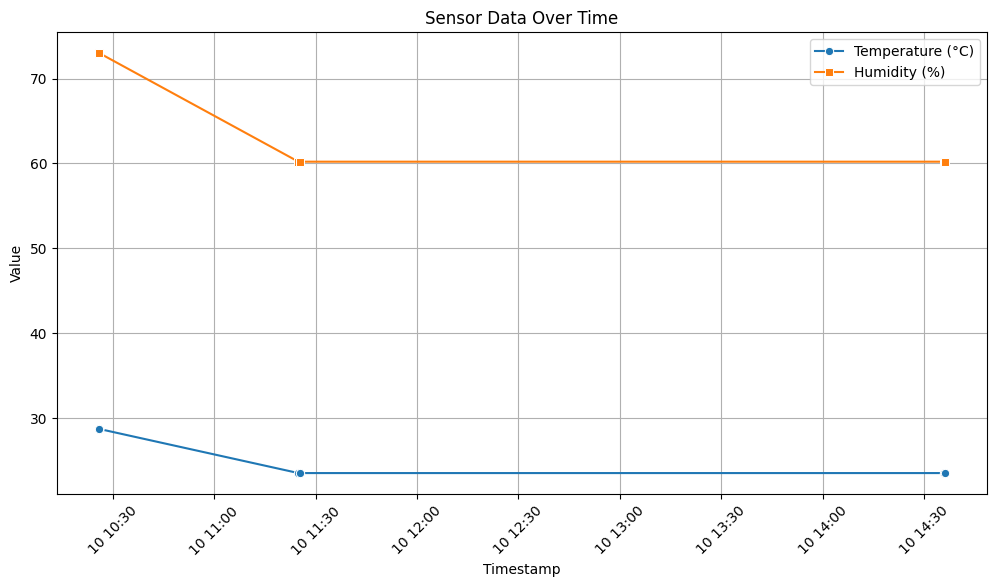

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the API URL and parameters
url = "https://api-service-intern.wishforhealth.id/data?table=sensor_data_raspi&limit=100"
params = {
    "table": "sensor_data_esp",  # Table name
    "limit": 10  # Number of records
}

# Fetch the data from the API
try:
    response = requests.get(url, params=params)
    response.raise_for_status()  # Raise an error for bad responses
    data = response.json()  # Convert response to JSON format
except requests.exceptions.RequestException as e:
    print("Error fetching data:", e)
    data = None

# Check if data was successfully fetched
if data:
    # Convert JSON data into a Pandas DataFrame
    df = pd.DataFrame(data)

    # Extract and normalize the 'data' column if it's nested JSON
    if 'data' in df.columns:
        df = pd.json_normalize(df['data'])  # Flatten nested JSON

    # Display the first few rows of the dataset
    print("Preview of the dataset:")
    display(df.head())

    # Check the structure of the DataFrame
    print("\nData Information:")
    print(df.info())

    # Ensure 'timestamp' column exists and convert it to datetime
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'])
    else:
        print("Error: 'timestamp' column not found in dataset.")
        print("Available columns:", df.columns)
        exit()

    # Plot Temperature & Humidity over Time
    plt.figure(figsize=(12, 6))

    if 'temperature' in df.columns and 'humidity' in df.columns:
        sns.lineplot(x=df['timestamp'], y=df['temperature'], label="Temperature (°C)", marker='o')
        sns.lineplot(x=df['timestamp'], y=df['humidity'], label="Humidity (%)", marker='s')

        plt.title('Sensor Data Over Time')
        plt.xlabel('Timestamp')
        plt.ylabel('Value')
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print("Error: Expected columns 'temperature' and 'humidity' not found.")
        print("Available columns:", df.columns)

else:
    print("Failed to retrieve data. Please check the API URL or parameters.")